We demonstrate downloading a preprocessed MNIST data pickle, loading it into a Python variable, and then inspecting and viewing part of it.

In [1]:
from fastai.vision.all import *

pickle_path = URLs.path('mnist_png')/'mnist_png.pkl'
path = untar_data(URLs.MNIST)/'training'

if not pickle_path.exists():
    pickle_path.parent.mkdir(parents=True, exist_ok=True)
    ds = DataBlock(
        blocks = (ImageBlock(PILImageBW), CategoryBlock),
        get_items = get_image_files,
        get_y = parent_label,
        splitter = RandomSplitter(1/6, seed=0)
    ).datasets(path)

    xs, ys = zip(*ds.train, *ds.valid)
    xs = np.stack(L(map(lambda x: np.array(x, dtype=np.float32).reshape(-1), xs))) / 255.
    ys = np.array(ys, dtype=np.int64)

    x_train, x_valid = xs[:len(ds.train)], xs[len(ds.train):]
    y_train, y_valid = ys[:len(ds.train)], ys[len(ds.train):]

    save_pickle(pickle_path, [x_train, y_train, x_valid, y_valid])

    del ds, xs, ys, x_train, y_train, x_valid, y_valid

x_train, y_train, x_valid, y_valid = load_pickle(pickle_path)

We now have a look at the data.

In [2]:
print(type(x_train))
print(x_train.shape)

<class 'numpy.ndarray'>
(50000, 784)


784 is the flattened 28-by-28 image. We preview the 201-th pixel to the 210-th pixel.

In [3]:
lst1 = list(x_train[0])
vals = lst1[200:210]
vals

[np.float32(0.0),
 np.float32(0.0),
 np.float32(0.0),
 np.float32(0.0),
 np.float32(0.0),
 np.float32(0.0),
 np.float32(0.0),
 np.float32(0.0),
 np.float32(0.0),
 np.float32(0.0)]

With an aim to produce a 28-by-28 image from a record, we define a function to extract chunks of size `sz` starting from `x`

In [4]:
def chunks(x, sz):
    for i in range(0, len(x), sz): yield x[i:i+sz]


In [5]:
list(chunks(vals, 5))


[[np.float32(0.0),
  np.float32(0.0),
  np.float32(0.0),
  np.float32(0.0),
  np.float32(0.0)],
 [np.float32(0.0),
  np.float32(0.0),
  np.float32(0.0),
  np.float32(0.0),
  np.float32(0.0)]]

And we produce it below.

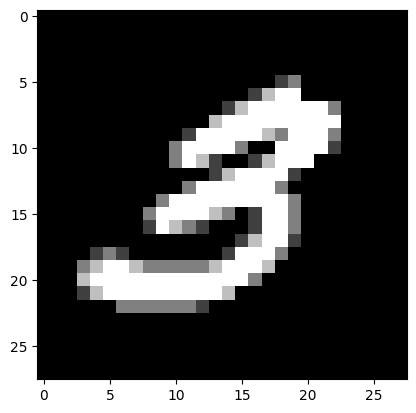

In [6]:
import matplotlib as mpl, matplotlib.pyplot as plt, matplotlib.cm as cm

plt.imshow(list(chunks(lst1, 28)), cmap=cm.gray);
